## Flowers classifications using Deep learning(Convolution N N.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count= len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses=list(data_dir.glob('roses/*'))

In [8]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

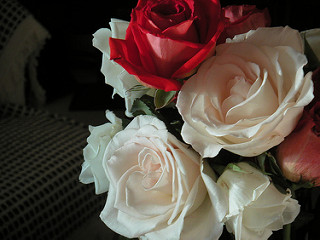

In [9]:
PIL.Image.open(str(roses[1]))

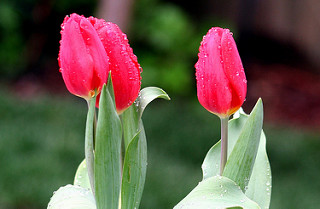

In [10]:
tulips= list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


##### Read flowers images from disk into numpy array using openCV

In [11]:
flowers_images_dist= {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowwers': list(data_dir.glob('sunflowwers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,  
    'sunflowwers':3,  
    'tulips':4,  

    
}

In [13]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowwers': 3, 'tulips': 4}

In [14]:
str(flowers_images_dist['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img=cv2.imread(str(flowers_images_dist['roses'][0]))

In [16]:
img.shape

(240, 179, 3)

In [17]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

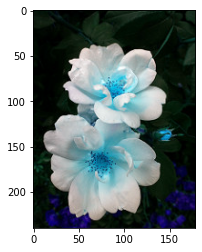

In [18]:
plt.imshow(img)

In [19]:
X = []
y = []

for flower_name, images in flowers_images_dist.items():
    for image in images:
        img= cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
    

In [20]:
X= np.array(X)
y= np.array(y)

In [21]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [22]:
y

array([0, 0, 0, ..., 4, 4, 4])

### Train test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)

### Proprocessing : Scale images

In [24]:
X_train_scaled=  X_train /255
X_test_scaled= X_test/255

### Bulild convolutional neural network and train it

In [25]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5)              

Epoch 1/5
70/70 [==============================] - 111s 1s/step - loss: 1.4734 - accuracy: 0.3919
Epoch 2/5
70/70 [==============================] - 71s 1s/step - loss: 0.9798 - accuracy: 0.5763
Epoch 3/5
70/70 [==============================] - 71s 1s/step - loss: 0.8324 - accuracy: 0.6532
Epoch 4/5
70/70 [==============================] - 73s 1s/step - loss: 0.6322 - accuracy: 0.7507
Epoch 5/5
70/70 [==============================] - 74s 1s/step - loss: 0.4958 - accuracy: 0.8101


In [26]:
model.evaluate(X_test_scaled, y_test)

24/24 [==============================] - 24s 291ms/step - loss: 1.0720 - accuracy: 0.6460


[1.071956992149353, 0.6460295915603638]

In [27]:
predictions= model.predict(X_test_scaled)

In [28]:
predictions

array([[  0.09827064,   2.8117213 ,   2.9703493 ,  -9.55651   ,
          0.14371513],
       [  4.1547694 ,   2.7316668 ,   2.730631  , -13.8851385 ,
         -1.0631036 ],
       [  5.4202785 ,  -5.2575827 ,  -3.2580693 , -15.47402   ,
          8.715871  ],
       ...,
       [  0.06309499,  -0.08710822,   4.4689426 , -14.114413  ,
          2.6706424 ],
       [ -0.30202213,   4.618478  ,   1.1743085 , -16.987442  ,
          3.3315082 ],
       [  4.2693067 ,  -0.35663465,  -1.8885158 , -14.877643  ,
          5.0853834 ]], dtype=float32)

In [29]:
score= tf.nn.softmax(predictions[0])

In [30]:
np.argmax(score)

2

In [31]:
y_test[1]

1

### Improve testt accuracy using Data Augmentation

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

(0.0, 1.0, 0.0, 1.0)

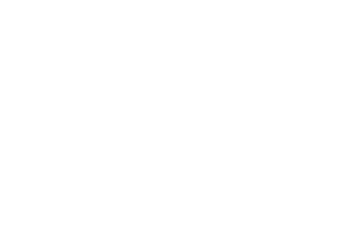

In [33]:
plt.axis('off')

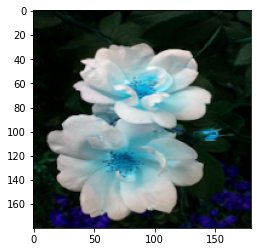

In [34]:
plt.imshow(X[0])

TypeError: imshow() missing 1 required positional argument: 'X'

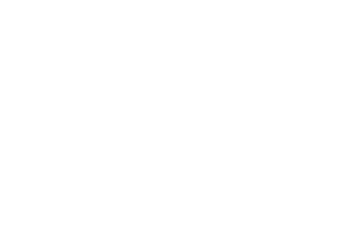

In [35]:
plt.axis('off')
plt.imshow()

### Train the model using data augmentation and a drop out layer

In [38]:
num_classes =5

model = Sequential ([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
70/70 [==============================] - 137s 1s/step - loss: 1.3603 - accuracy: 0.3682
Epoch 2/30
70/70 [==============================] - 85s 1s/step - loss: 1.0073 - accuracy: 0.5614
Epoch 3/30
70/70 [==============================] - 84s 1s/step - loss: 0.9032 - accuracy: 0.6311
Epoch 4/30
70/70 [==============================] - 85s 1s/step - loss: 0.8454 - accuracy: 0.6636
Epoch 5/30
70/70 [==============================] - 84s 1s/step - loss: 0.8130 - accuracy: 0.6838
Epoch 6/30
70/70 [==============================] - 84s 1s/step - loss: 0.7531 - accuracy: 0.7042
Epoch 7/30
70/70 [==============================] - 85s 1s/step - loss: 0.7548 - accuracy: 0.7093
Epoch 8/30
70/70 [==============================] - 89s 1s/step - loss: 0.6930 - accuracy: 0.7255
Epoch 9/30
70/70 [==============================] - 95s 1s/step - loss: 0.6476 - accuracy: 0.7534
Epoch 10/30
70/70 [==============================] - 87s 1s/step - loss: 0.6158 - accuracy: 0.7651
Epoch 11/30
70/70 

In [40]:
model.evaluate(X_test_scaled, y_test)

24/24 [==============================] - 9s 333ms/step - loss: 0.7884 - accuracy: 0.7376


[0.7884058356285095, 0.7375504970550537]